In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from sklearn.metrics import classification_report, confusion_matrix

In [16]:
heart = pd.read_csv('framingham.csv')
heart.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [17]:
heart = heart.drop(['education'], axis=1)

### Missing values

In [18]:
heart.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [21]:
count = 0
for i in heart.isnull().sum(axis=1):
    if i>0:
        count=count+1
        print("Total numer of rows with missing values is ", count)
        print("since it is only", ((count/len(heart.index)*100), 'percent of the entire dataset the rows with missing values are excluded'))

Total numer of rows with missing values is  1
since it is only (0.02358490566037736, 'percent of the entire dataset the rows with missing values are excluded')
Total numer of rows with missing values is  2
since it is only (0.04716981132075472, 'percent of the entire dataset the rows with missing values are excluded')
Total numer of rows with missing values is  3
since it is only (0.07075471698113207, 'percent of the entire dataset the rows with missing values are excluded')
Total numer of rows with missing values is  4
since it is only (0.09433962264150944, 'percent of the entire dataset the rows with missing values are excluded')
Total numer of rows with missing values is  5
since it is only (0.1179245283018868, 'percent of the entire dataset the rows with missing values are excluded')
Total numer of rows with missing values is  6
since it is only (0.14150943396226415, 'percent of the entire dataset the rows with missing values are excluded')
Total numer of rows with missing values i

since it is only (3.891509433962264, 'percent of the entire dataset the rows with missing values are excluded')
Total numer of rows with missing values is  166
since it is only (3.9150943396226414, 'percent of the entire dataset the rows with missing values are excluded')
Total numer of rows with missing values is  167
since it is only (3.938679245283019, 'percent of the entire dataset the rows with missing values are excluded')
Total numer of rows with missing values is  168
since it is only (3.9622641509433962, 'percent of the entire dataset the rows with missing values are excluded')
Total numer of rows with missing values is  169
since it is only (3.985849056603773, 'percent of the entire dataset the rows with missing values are excluded')
Total numer of rows with missing values is  170
since it is only (4.009433962264151, 'percent of the entire dataset the rows with missing values are excluded')
Total numer of rows with missing values is  171
since it is only (4.033018867924528, '

Total numer of rows with missing values is  362
since it is only (8.537735849056602, 'percent of the entire dataset the rows with missing values are excluded')
Total numer of rows with missing values is  363
since it is only (8.56132075471698, 'percent of the entire dataset the rows with missing values are excluded')
Total numer of rows with missing values is  364
since it is only (8.584905660377357, 'percent of the entire dataset the rows with missing values are excluded')
Total numer of rows with missing values is  365
since it is only (8.608490566037736, 'percent of the entire dataset the rows with missing values are excluded')
Total numer of rows with missing values is  366
since it is only (8.632075471698112, 'percent of the entire dataset the rows with missing values are excluded')
Total numer of rows with missing values is  367
since it is only (8.65566037735849, 'percent of the entire dataset the rows with missing values are excluded')
Total numer of rows with missing values is

In [23]:
heart = heart.dropna(axis=1)

### Exploratory Analysis

AttributeError: 'Figure' object has no attribute 'tight_laout'

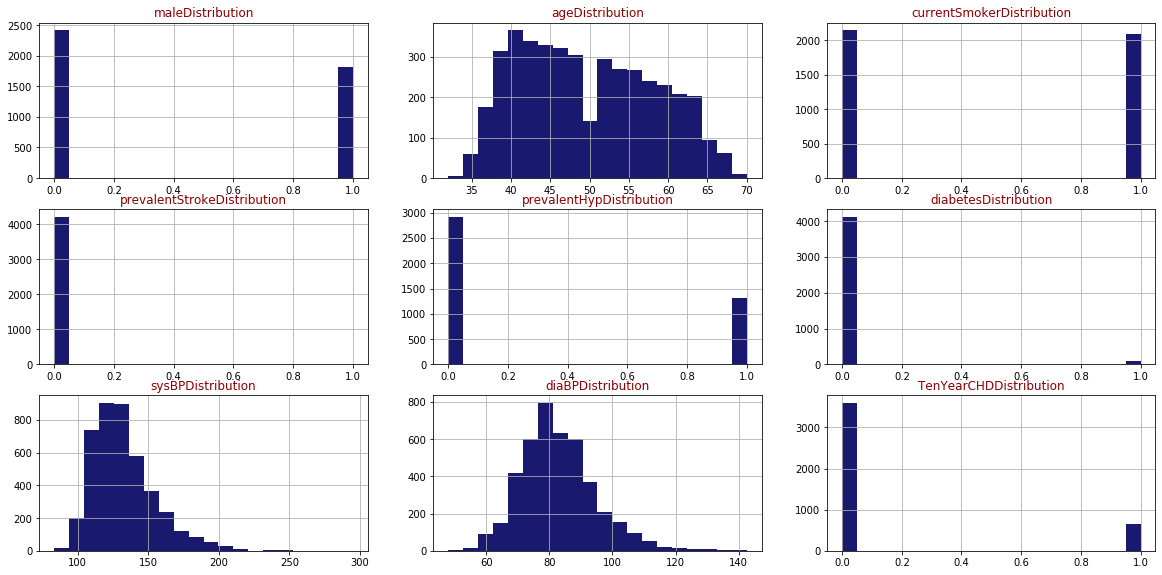

In [41]:
def draw_histogram(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows, cols, i+1)
        dataframe[feature].hist(bins=20, ax=ax,facecolor='midnightblue')
        ax.set_title(feature+"Distribution", color="DarkRed")
        
    fig.tight_laout()
    plt.show()
draw_histogram(heart, heart.columns,6,3)

In [26]:
heart.TenYearCHD.value_counts()

0    3596
1     644
Name: TenYearCHD, dtype: int64

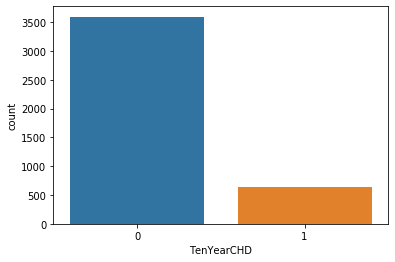

In [28]:
import seaborn as sns
sns.countplot(x = 'TenYearCHD', data=heart)

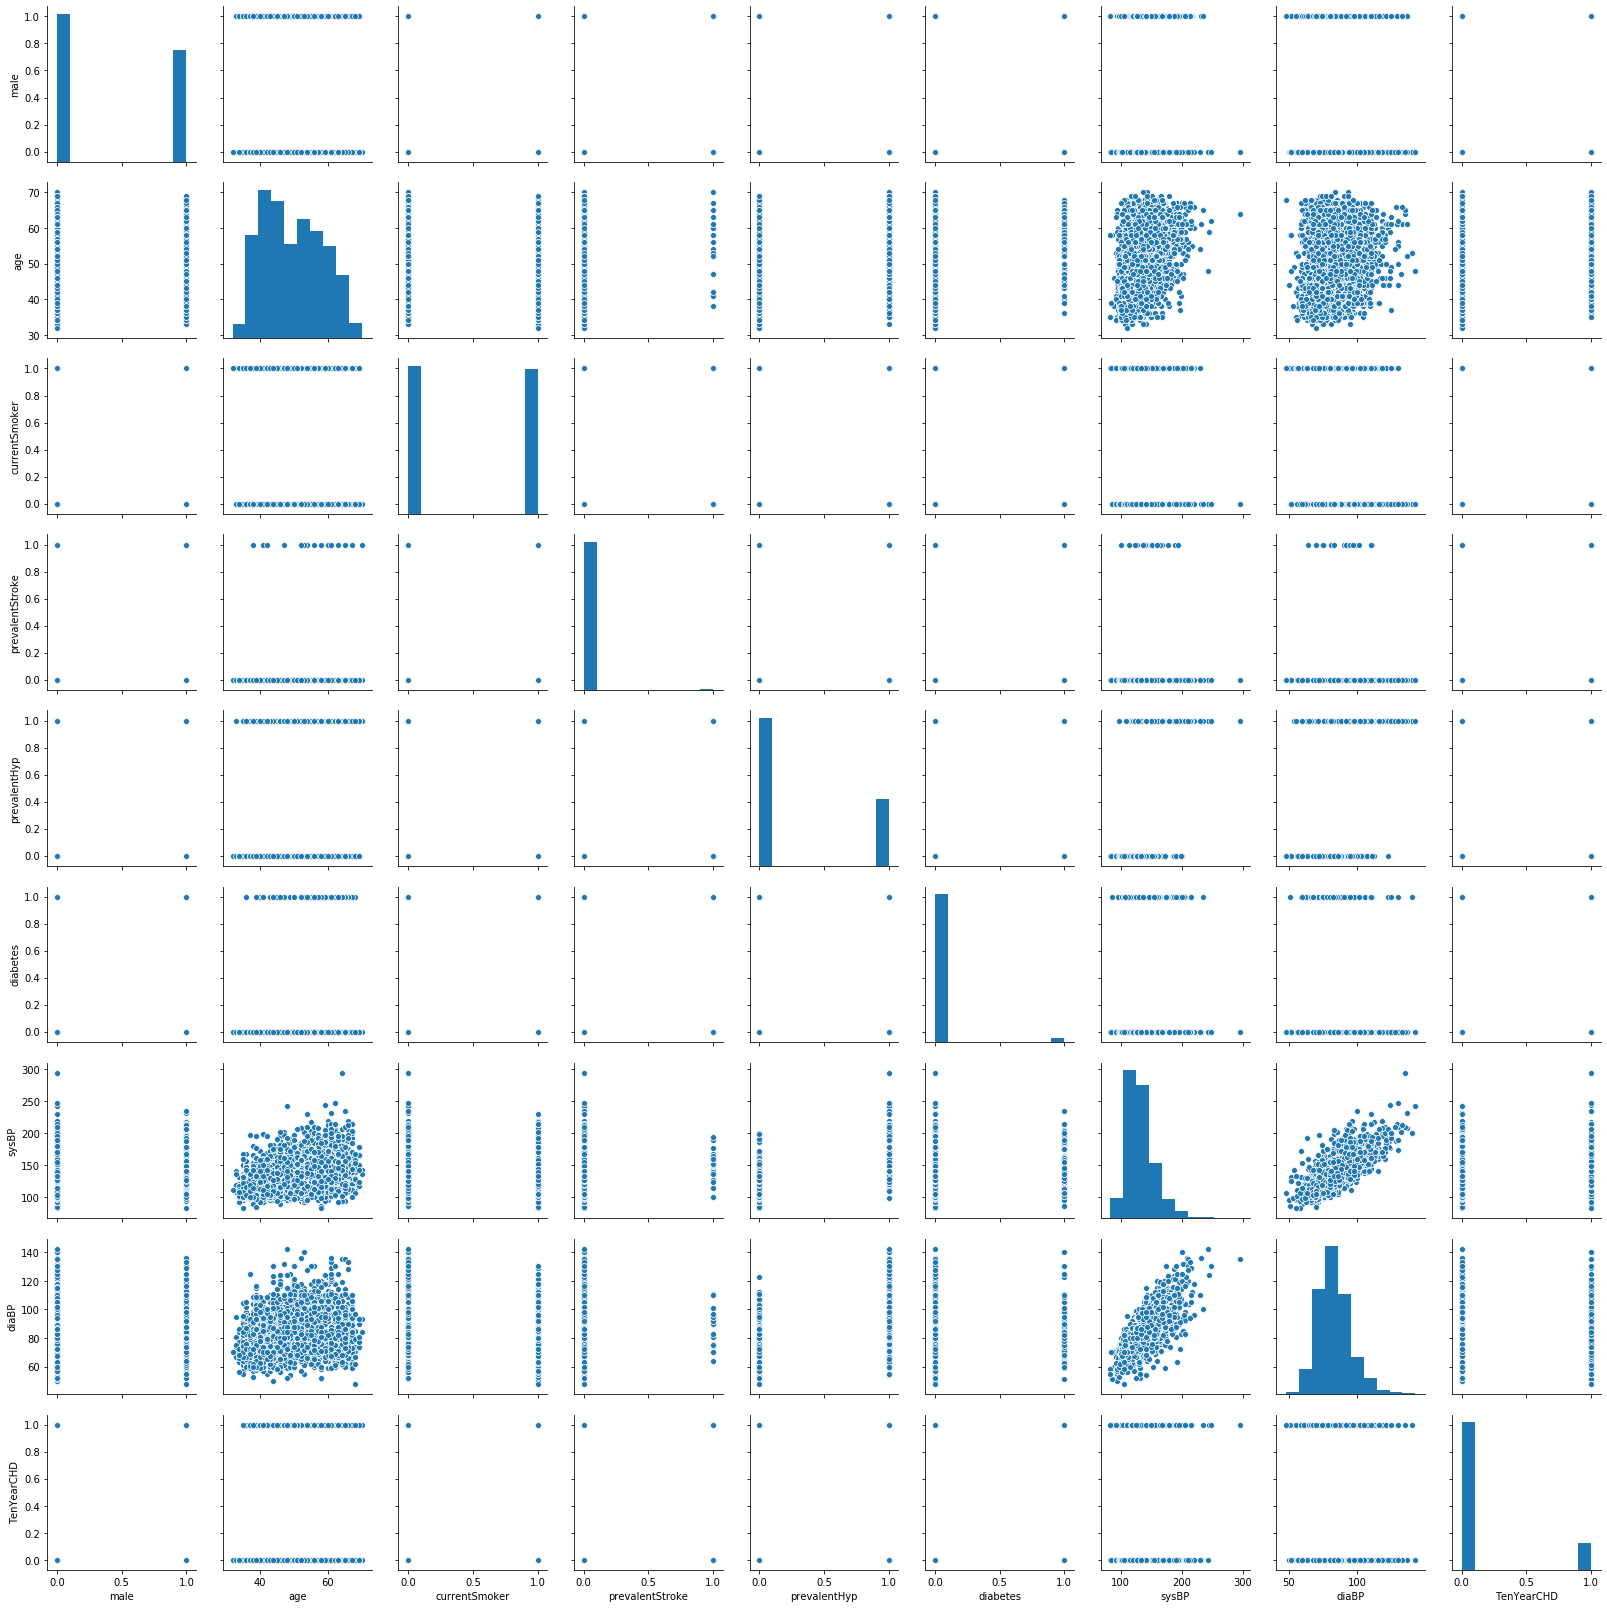

In [30]:
sns.pairplot(data=heart)

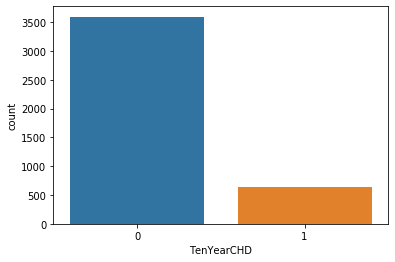

In [31]:
sns.countplot(x='TenYearCHD', data= heart)

In [33]:
heart.describe()

,male,age,currentSmoker,prevalentStroke,prevalentHyp,diabetes,sysBP,diaBP,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,0.494104,0.005896,0.310613,0.025708,132.354599,82.897759,0.151887
std,0.495027,8.572942,0.500024,0.076569,0.462799,0.158280,22.033300,11.910394,0.358953
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,83.500000,48.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,117.000000,75.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,128.000000,82.000000,0.000000
75%,1.000000,56.000000,1.000000,0.000000,1.000000,0.000000,144.000000,90.000000,0.000000
max,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,295.000000,142.500000,1.000000


### Process of Logistic Regression

In [34]:
from statsmodels.tools import add_constant as add_constant
heart_constant = add_constant(heart)
heart_constant.head()

/root/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,male,age,currentSmoker,prevalentStroke,prevalentHyp,diabetes,sysBP,diaBP,TenYearCHD
0,1.0,1,39,0,0,0,0,106.0,70.0,0
1,1.0,0,46,0,0,0,0,121.0,81.0,0
2,1.0,1,48,1,0,0,0,127.5,80.0,0
3,1.0,0,61,1,0,1,0,150.0,95.0,1
4,1.0,0,46,1,0,0,0,130.0,84.0,0


In [36]:
heart_constant.columns

Index(['const', 'male', 'age', 'currentSmoker', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'sysBP', 'diaBP', 'TenYearCHD'],
      dtype='object')

In [42]:
st.chisqprob= lambda chisq, df: st.chi2.sf(chisq, df)
cols = heart_constant.columns[:-1]
model = sm.Logit(heart.TenYearCHD, heart_constant[cols])
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.381837
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4231
Method:                           MLE   Df Model:                            8
Date:                Mon, 01 Jun 2020   Pseudo R-squ.:                  0.1036
Time:                        20:01:13   Log-Likelihood:                -1619.0
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 6.051e-76
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -7.3302      0.490    -14.949      0.000      -8.291      -6.369
male                0.5723      0.094      6.056      0.000       0.387       0.758
age                 0.0616      0.006     10.203      0.000       0.050       0.073
currentSmoker       0.3835      0.096      3.997      0.000       0.195       0.571
prevalentStroke     1.0043      0.437      2.300      0.021       0.148       1.860
prevalentHyp        0.2425      0.127      1.908      0.056      -0.007       0.492
diabetes            0.7762      0.217      3.577      0.000       0.351       1.201
sysBP               0.0157      0.003      4.507      0.000       0.009       0.023
diaBP              -0.0036      0.006     -0.619      0.536      -0.015       0.008
===================================================================================
"""

### Feature selection: Backward elimination

In [43]:
def back_feature (data_frame, dep_var, col_list):
    while len(col_list)>0:
        model=sm.Logit(dep_var, data_frame[col_list])
        result = model.fit(disp=0)
        largest_pvalue = round(result.pvalue, 3).nlargest(1)
        if largest_p_value[0]<(0.05):
            return result
            break
        else:
            col_list = col_list.drop(largest_pvalue.index)
    result = back_feature(heart_constant, heart.TenYearCHD)

In [44]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4231
Method:                           MLE   Df Model:                            8
Date:                Mon, 01 Jun 2020   Pseudo R-squ.:                  0.1036
Time:                        20:35:55   Log-Likelihood:                -1619.0
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 6.051e-76
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -7.3302      0.490    -14.949      0.000      -8.291      -6.369
male                0.5723      0.094      6.056      0.000       0.387       0.758
age                 0.0616      0.006     10.203      0.000       0.050       0.073
currentSmoker       0.3835      0.096      3.997      0.000       0.195       0.571
prevalentStroke     1.0043      0.437      2.300      0.021       0.148       1.860
prevalentHyp        0.2425      0.127      1.908      0.056      -0.007       0.492
diabetes            0.7762      0.217      3.577      0.000       0.351       1.201
sysBP               0.0157      0.003      4.507      0.000       0.009       0.023
diaBP              -0.0036      0.006     -0.619      0.536      -0.015       0.008
===================================================================================
"""

In [45]:
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue = round(result.pvalues, 3)
conf['pvalue'] = pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'odds Ratio', 'pvalue']
print((conf))

                 CI 95%(2.5%)  CI 95%(97.5%)  odds Ratio  pvalue
const                0.000251       0.001714    0.000655   0.000
male                 1.472680       2.132966    1.772336   0.000
age                  1.051051       1.076235    1.063569   0.000
currentSmoker        1.215857       1.770912    1.467371   0.000
prevalentStroke      1.159878       6.425421    2.729964   0.021
prevalentHyp         0.993392       1.635083    1.274472   0.056
diabetes             1.420412       3.324990    2.173213   0.000
sysBP                1.008926       1.022821    1.015850   0.000
diaBP                0.985083       1.007843    0.996398   0.536


In [46]:
heart.columns

Index(['male', 'age', 'currentSmoker', 'prevalentStroke', 'prevalentHyp',
       'diabetes', 'sysBP', 'diaBP', 'TenYearCHD'],
      dtype='object')

In [49]:
import sklearn
new_feature = heart[['male', 'age', 'currentSmoker', 'prevalentStroke', 'prevalentHyp','diabetes', 'sysBP', 'diaBP', 'TenYearCHD']]
x = new_feature.iloc[:,:-1]
y = new_feature.iloc[:, -1]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.20, random_state=5)

In [50]:
x

,male,age,currentSmoker,prevalentStroke,prevalentHyp,diabetes,sysBP,diaBP
0,1,39,0,0,0,0,106.0,70.0
1,0,46,0,0,0,0,121.0,81.0
2,1,48,1,0,0,0,127.5,80.0
3,0,61,1,0,1,0,150.0,95.0
4,0,46,1,0,0,0,130.0,84.0
...,...,...,...,...,...,...,...,...
4235,0,48,1,0,0,0,131.0,72.0
4236,0,44,1,0,0,0,126.5,87.0
4237,0,52,0,0,0,0,133.5,83.0
4238,1,40,0,0,1,0,141.0,98.0


In [51]:
y

0       0
1       0
2       0
3       1
4       0
       ..
4235    0
4236    0
4237    0
4238    0
4239    0
Name: TenYearCHD, Length: 4240, dtype: int64

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
model = LogisticRegression()

In [56]:
model.fit(x_train, y_train)

/root/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
y_pred = model.predict(x_test)

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       715
           1       0.80      0.03      0.06       133

    accuracy                           0.85       848
   macro avg       0.82      0.51      0.49       848
weighted avg       0.84      0.85      0.78       848



In [59]:
print(confusion_matrix(y_test, y_pred))

[[714   1]
 [129   4]]


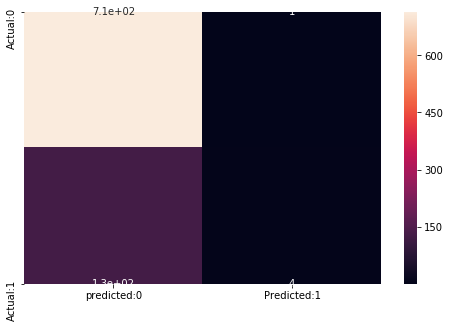

In [69]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data=cm, columns=['predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True) #, fmt='d', cmap='YIGnBu'

In [70]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specififity=TN/float(TN+FP)

In [79]:
print('accuracy = TP+TN/(TP+TN+FP+FN) = ', (TP+TN)/float(TP+TN+FP+FN), '\n',
      'Missclassification = 1-accuracy = ', 1-((TP+TN)/float(TP+TN+FP+FN)))

accuracy = TP+TN/(TP+TN+FP+FN) =  0.8466981132075472 
 Missclassification = 1-accuracy =  0.15330188679245282
